<a href="https://colab.research.google.com/github/Chamusuke/python_time-lapse/blob/main/event_based_camera_detaset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# イベントカメラのデータセット
フレーム画像から動画作成

### Exsample
Zhu, A. Z., Thakur, D., Ozaslan, T., Pfrommer, B., Kumar, V., & Daniilidis, K. (2018). The Multi Vehicle Stereo Event Camera Dataset: An Event Camera Dataset for 3D Perception. IEEE Robotics and Automation Letters, 3(3), 2032-2039.
https://www.cis.upenn.edu/~kostas/mypub.dir/alex18ral.pdf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt #実際にプロットする
import numpy as np #データの整理
import pandas as pd #データフレームのライブラリ
import h5py
import cv2
import time

data = h5py.File('/content/drive/MyDrive/outdoor_day/outdoor_day2_data.hdf5')
images = data['davis']['left']['image_raw']
image_ts = data['davis']['left']['image_raw_ts']
image_raw_event_inds = data['davis']['left']['image_raw_event_inds']


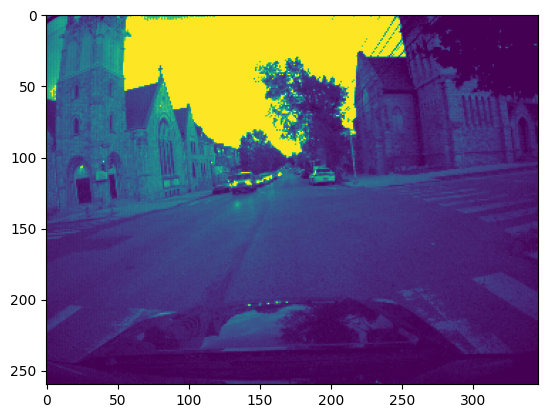

In [ ]:
plt.imshow(images[6000])

In [ ]:
# 画像の数とサイズを取得
num_images, height, width = images.shape

# 画像を格納するための空のリストを作成
image_list = []

# 画像を読み込んでリストに追加
for i in range(num_images):
    image_data = images[i]
    image = np.array(image_data)
    image_list.append(image)


In [ ]:

# 画像とタイムスタンプからタイムラプスを作成
# 動画の保存パスとファイル名
output_path = '/content/drive/MyDrive/event-based-cameraoutput.mp4'

# 動画のフレームレート（FPS）を設定
fps = 30

# 画像のサイズを取得
height, width = images.shape[1], images.shape[2]

def create_video_from_h5py(images, image_ts, output_path, fps=30):
    # 画像のサイズを取得
    height, width = images.shape[1], images.shape[2]

    # 動画の出力設定
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # 最初のフレームのタイムスタンプを取得
    start_time = image_ts[0]

    # 画像とタイムスタンプの対応をループで処理
    print("動画変換中...")
    for i in range(len(images)):
        # タイムスタンプからフレームの時間を計算
        frame_time = (image_ts[i] - start_time) / 1000.0

        # 画像データを取得
        frame = images[i]

        # 画像をBGRからRGBに変換
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)

        # 画像を動画に書き込む
        out.write(frame_rgb)

    # 動画ファイルをクローズしてリソースを解放
    out.release()
    print("動画変換完了")


if __name__ == '__main__':
    start = time.time()

    print("画像の総枚数{0}".format(len(images)))
    path = ('/content/drive/MyDrive/event-based-camera/video_1.mp4')
    create_video_from_h5py(images, image_ts, path)
    elapsed_time = time.time() - start
    print ("処理にかかった時間は:{0}".format(elapsed_time) + "[sec]")

動画変換完了
画像の総枚数28583
動画変換中...
動画変換完了
処理にかかった時間は:60.34979844093323[sec]


In [ ]:
#各DAVIS画像に時間的に最も近いイベントのインデックスを含めタイムラプス
# 動画の保存パスとファイル名
output_path = '/content/drive/MyDrive/event-based-camera/event.mp4'

def create_video_with_events(images, image_ts, event_inds, output_path, fps=30):
    # 画像のサイズを取得
    height, width = images.shape[1], images.shape[2]

    # 動画の出力設定
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # 最初のフレームのタイムスタンプを取得
    start_time = image_ts[0]

    # 画像とタイムスタンプ、イベントの対応をループで処理
    print("動画変換中...")
    for i in range(len(images)):
        # タイムスタンプからフレームの時間を計算
        frame_time = (image_ts[i] - start_time) / 1000.0

        # 画像データを取得
        frame = images[i]

        # 画像をBGRからRGBに変換
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)

        # イベントインデックスを取得
        event_ind = event_inds[i]

        # イベントに関連する処理（ここでは例としてイベントインデックスを表示）
        event_info = f"Event Index: {event_ind}"
        cv2.putText(frame_rgb, event_info, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # 画像を動画に書き込む
        out.write(frame_rgb)

    # 動画ファイルをクローズしてリソースを解放
    out.release()
    print("動画変換完了")



if __name__ == '__main__':
    start = time.time()

    print("画像の総枚数{0}".format(len(images)))
    path = ('/content/drive/MyDrive/event-based-camera/video_1.mp4')
    create_video_with_events(images, image_ts, image_raw_event_inds, path)
    elapsed_time = time.time() - start
    print ("処理にかかった時間は:{0}".format(elapsed_time) + "[sec]")

画像の総枚数28583
動画変換中...
動画変換完了
処理にかかった時間は:59.55207109451294[sec]
